# Description

1. [Imports](#Imports)
2. [Distributed Data](#Distributed-Data)
3. [Data Generator](#Data-Generator)
4. [Graphs](#Graphs)
5. [Create File](#To-File)

# Imports
[Go to Top](#Description)

In [1]:
import gzip
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'G:\\My Drive\\Work\\FactiHealth\\factihealth\\Version 1.1\\ED\\Codes'

In [3]:
folder_path = '..\Data\mimic_iv_ed_2_2\ed'
current_path = os.getcwd()
os.chdir(folder_path)

In [4]:
os.getcwd()

'G:\\My Drive\\Work\\FactiHealth\\factihealth\\Version 1.1\\ED\\Data\\mimic_iv_ed_2_2\\ed'

In [5]:

def get_all_files():
  files = []
  for file_name in os.listdir():
#     file_path = os.path.join(os.getcwd(), file_name)
    if os.path.isfile(file_name):
        if file_name.split('.')[-1] == 'gz':
            files.append(file_name)
  return files

# Example usage:

files = get_all_files()

print(files)


['edstays.csv.gz', 'pyxis.csv.gz', 'diagnosis.csv.gz', 'triage.csv.gz', 'vitalsign.csv.gz', 'medrecon.csv.gz']


In [6]:
for f in files:
    with gzip.open(f, 'rb') as f_in:
    # Read the contents of the .gz file
        csv_data = f_in.read()
        f_csv = f.split('.')[0]+'.csv'


    with open(f_csv, 'wt', encoding="utf-8") as f_out:
        # Write the contents of the CSV data to the new file
        f_out.write(csv_data.decode())

    
    df = pd.read_csv(f_csv)
    print(f_csv, df.shape)
    print(f)
    if f != 'edstays.csv.gz':
        os.remove(f.split('.')[0]+'.csv')
    display(df.head())
    

edstays.csv (425087, 9)
edstays.csv.gz


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


pyxis.csv (1586053, 7)
pyxis.csv.gz


,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
0,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,1,5037.0
1,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,2,28090.0
2,10000032,35968195,2180-08-05 22:29:00,1,Morphine,1,4080.0
3,10000032,35968195,2180-08-05 22:55:00,2,Donnatol (Elixir),1,4773.0
4,10000032,35968195,2180-08-05 22:55:00,3,Aluminum-Magnesium Hydrox.-Simet,1,2701.0


diagnosis.csv (899050, 6)
diagnosis.csv.gz


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


triage.csv (425087, 11)
triage.csv.gz


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


vitalsign.csv (1564610, 11)
vitalsign.csv.gz


,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


medrecon.csv (2987342, 9)
medrecon.csv.gz


,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives
3,10000032,32952584,2180-07-22 17:26:00,emtricitabine-tenofovir [Truvada],57883,35356007003,1,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,32952584,2180-07-22 17:26:00,fluticasone [Flovent HFA],21251,49999061401,1,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [7]:
edstays = pd.read_csv('edstays.csv')
## Transform to DateTime from String
edstays[['intime','outtime']] = edstays[['intime','outtime']].apply(pd.to_datetime, errors='coerce')
##Get the date
edstays['indate'] = edstays['intime'].dt.date
edstays['outdate'] = edstays['outtime'].dt.date
##Get the day
# edstays['inday'] = edstays['intime'].dt.dayofweek
# edstays['outday'] = edstays['outtime'].dt.dayofweek
edstays['is_weekend'] = (edstays['intime'].dt.dayofweek >= 5).astype(int)

# Distributed Data
[Go to Top](#Description)

This block converts the N no of years and convert get an average count of all the Years for each months

In [8]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,indate,outdate,is_weekend
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,2180-05-06,2180-05-06,1
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,2180-06-26,2180-06-26,0
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,2180-08-05,2180-08-06,1
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,2180-07-22,2180-07-23,1
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,2180-07-23,2180-07-23,1


In [9]:
import random
random.seed(42)

## Scaling Factor considered from https://www.cdc.gov/nchs/data/nhamcs/web_tables/2021-nhamcs-ed-web-tables-508.pdf
scaling_factor = 139781

list_year = random.sample(range(2100, 2200 + 1), 1)
# list_year.append(list_year[0]+1)

print((list_year))

[2181]


In [10]:
df_all = pd.DataFrame()
for yr in list_year:
    df_yr = edstays[(edstays['intime'] > pd.to_datetime(str(yr))) &
                    (edstays['intime'] < pd.to_datetime(str(yr+1)))]
    
    df_yr['inmonth'] = df_yr['intime'].dt.month
    df_yr['inday'] = df_yr['intime'].dt.date
    df_all[str(yr)] = df_yr.groupby(['inday'])[['stay_id']].count()
df_all['Count'] = df_all.mean(axis=1)
print(df_all.shape)
df_all['Count']

total_sum_count = df_all['Count'].sum()
scaling_factor_dataset = scaling_factor / total_sum_count

df_all['scaled_count'] = df_all['Count'] * int(scaling_factor_dataset)
df_all.reset_index(inplace=True)
df_all.head()


(365, 2)


,inday,2181,Count,scaled_count
0,2181-01-01,17,17.0,425.0
1,2181-01-02,12,12.0,300.0
2,2181-01-03,13,13.0,325.0
3,2181-01-04,9,9.0,225.0
4,2181-01-05,13,13.0,325.0


In [11]:
## Get the Year of the predictions
year_ = pd.to_datetime(df_all['inday']).dt.year[0]
year_

2181

In [12]:
df_all['inday'] = df_all['inday'].apply(lambda x: x.replace(year=2021))
df_all.head()

,inday,2181,Count,scaled_count
0,2021-01-01,17,17.0,425.0
1,2021-01-02,12,12.0,300.0
2,2021-01-03,13,13.0,325.0
3,2021-01-04,9,9.0,225.0
4,2021-01-05,13,13.0,325.0


In [13]:
df_all['Date'] = df_all['inday']
distributed_data = pd.DataFrame()
distributed_data[['Date', 'Count']] = df_all[['Date', 'scaled_count']]
distributed_data.tail()

,Date,Count
360,2021-12-27,125.0
361,2021-12-28,400.0
362,2021-12-29,350.0
363,2021-12-30,350.0
364,2021-12-31,200.0


# Data Generator
[Go to Top](#Description)

This block of codes generates patient details.
Patient id, Stay id, Gender, timestamps, Dispotition is generated
A patient can have multiple entries across any day of the year. But will have a unique stayid each time they get admission

In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(50)
np.random.seed(50)


# Create a date range for two years
date_range = distributed_data.Date.tolist()

# Initialize empty lists to store data
data = {'Date_Time_Admission': [], 'Patient_ID': [], 'Stay_ID': [], 'Gender': [], 'Mode_of_Arrival': [],
        'Discharge_Time': [], 'Disposition': []}


# patients list
patient_list = []
# Simulate data for each day in the date range
for date in date_range:
    num_patients = int(distributed_data[distributed_data.Date == date]['Count'].values[0])  # Number of patients for the day
    for _ in range(num_patients):
        # Generate patient information
        patient_id = 'P'+str(random.randint(1000, 9999))
        ## If patient already visted the hospital, get the same gender
        if patient_id in patient_list:
            gender = data['Gender'][data['Patient_ID'].index(patient_id)]
        else:
            gender = random.choice(['Male', 'Female'])
            
        patient_list.append(patient_id)
        stay_id = 'A'+str(random.randint(10000, 99999))
        
        mode_of_arrival = random.choice(['Ambulance', 'Own Vehicle', 'Walk In', 'Other'])
        
#         time_of_day = 'Morning' if 6 <= date.hour < 12 else \
#                      'Afternoon' if 12 <= date.hour < 18 else \
#                      'Evening' if 18 <= date.hour < 24 else 'Night'
        
        in_time = pd.to_datetime(date)+ timedelta(minutes=random.randint(0, 1440))
        discharge_time = in_time + timedelta(minutes=random.randint(180, 480))
        disposition = random.choice(['HOME', 'ADMITTED', 'ELOPED', 'TRANSFER', 'LEFT WITHOUT BEING SEEN', 
                                     'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED'])

        # Append data to the lists
        data['Date_Time_Admission'].append(in_time)
        data['Patient_ID'].append(patient_id)
        data['Stay_ID'].append(stay_id)
        data['Gender'].append(gender)
        data['Mode_of_Arrival'].append(mode_of_arrival)
        data['Discharge_Time'].append(discharge_time)
        data['Disposition'].append(disposition)
        

# Create a DataFrame from the data
generated_data = pd.DataFrame(data)

generated_data['Date'] = generated_data['Date_Time_Admission'].dt.date 
generated_data['Date'] = generated_data['Date'].astype(str)
generated_data.sort_values(by='Date_Time_Admission',inplace=True)
generated_data.head()

,Date_Time_Admission,Patient_ID,Stay_ID,Gender,Mode_of_Arrival,Discharge_Time,Disposition,Date
86,2021-01-01 00:04:00,P7357,A78543,Female,Ambulance,2021-01-01 03:28:00,ADMITTED,2021-01-01
162,2021-01-01 00:04:00,P3786,A91152,Female,Walk In,2021-01-01 07:20:00,LEFT AGAINST MEDICAL ADVICE,2021-01-01
174,2021-01-01 00:06:00,P3219,A46926,Female,Own Vehicle,2021-01-01 03:46:00,EXPIRED,2021-01-01
236,2021-01-01 00:07:00,P6034,A53564,Female,Walk In,2021-01-01 07:59:00,LEFT WITHOUT BEING SEEN,2021-01-01
75,2021-01-01 00:17:00,P6419,A10792,Male,Other,2021-01-01 08:10:00,ADMITTED,2021-01-01


In [15]:
start_datetime = datetime(2023, 10, 26, 10, 0, 0)
end_datetime = datetime(2023, 10, 28, 13, 20, 0)
time_difference = end_datetime-start_datetime
formatted_difference = time_difference

print(f"Difference in time: {formatted_difference}")

Difference in time: 2 days, 3:20:00


In [16]:
generated_data.Date.value_counts()#.reset_index()

Date
2021-04-10    749
2021-04-18    747
2021-03-24    724
2021-07-07    649
2021-11-21    625
             ... 
2021-09-18    151
2021-03-13    151
2021-09-08    150
2021-11-10    150
2021-12-27    125
Name: count, Length: 365, dtype: int64

In [17]:
generated_data.Date_Time_Admission.max()

Timestamp('2021-12-31 23:53:00')

# Graphs
[Go to Top](#Description)

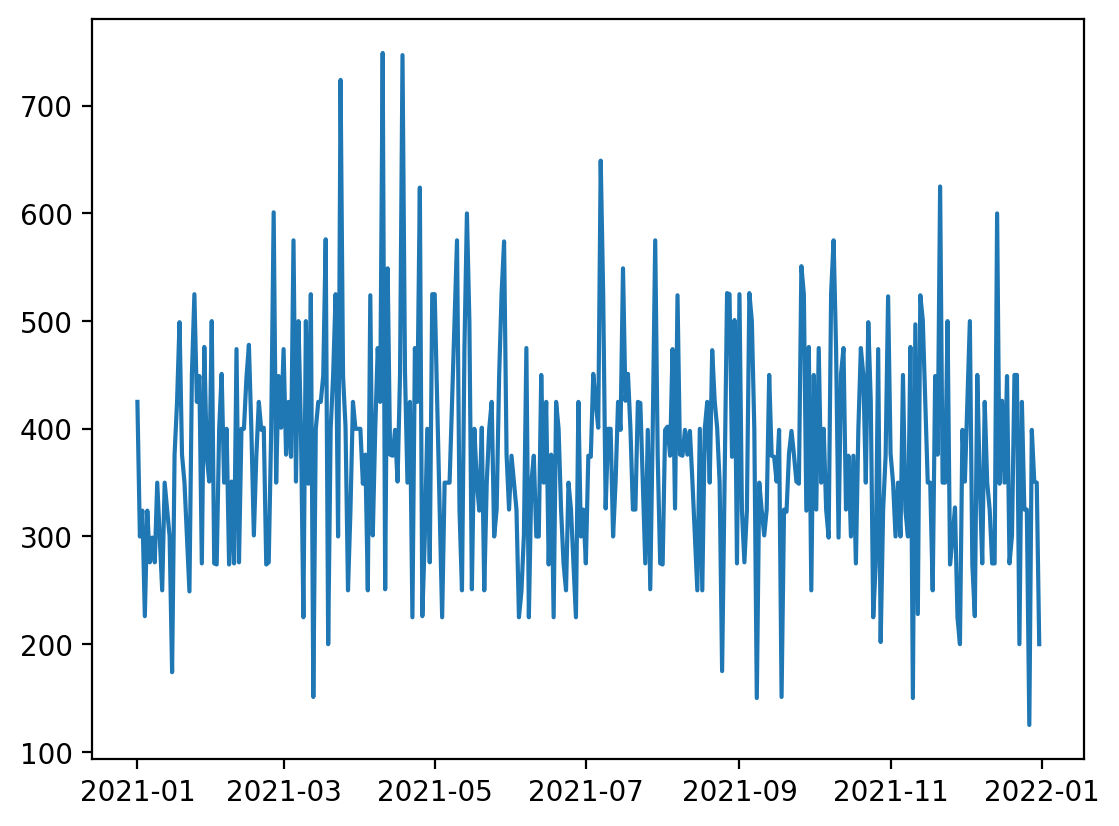

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_g=generated_data.Date_Time_Admission.dt.date.value_counts().reset_index()#.plot()
df_g.set_index('Date_Time_Admission', inplace=True)
df_g.sort_index(inplace=True)

plt.plot(df_g.index, df_g['count'])
# ax = df_g['Date_Time_Admission'].plot()

In [19]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,indate,outdate,is_weekend
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,2180-05-06,2180-05-06,1
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,2180-06-26,2180-06-26,0
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,2180-08-05,2180-08-06,1
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,2180-07-22,2180-07-23,1
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,2180-07-23,2180-07-23,1


In [20]:
mimic_ds = edstays[edstays.intime.dt.year==year_]#.shape

# EDA
[Go to Top](#Description)

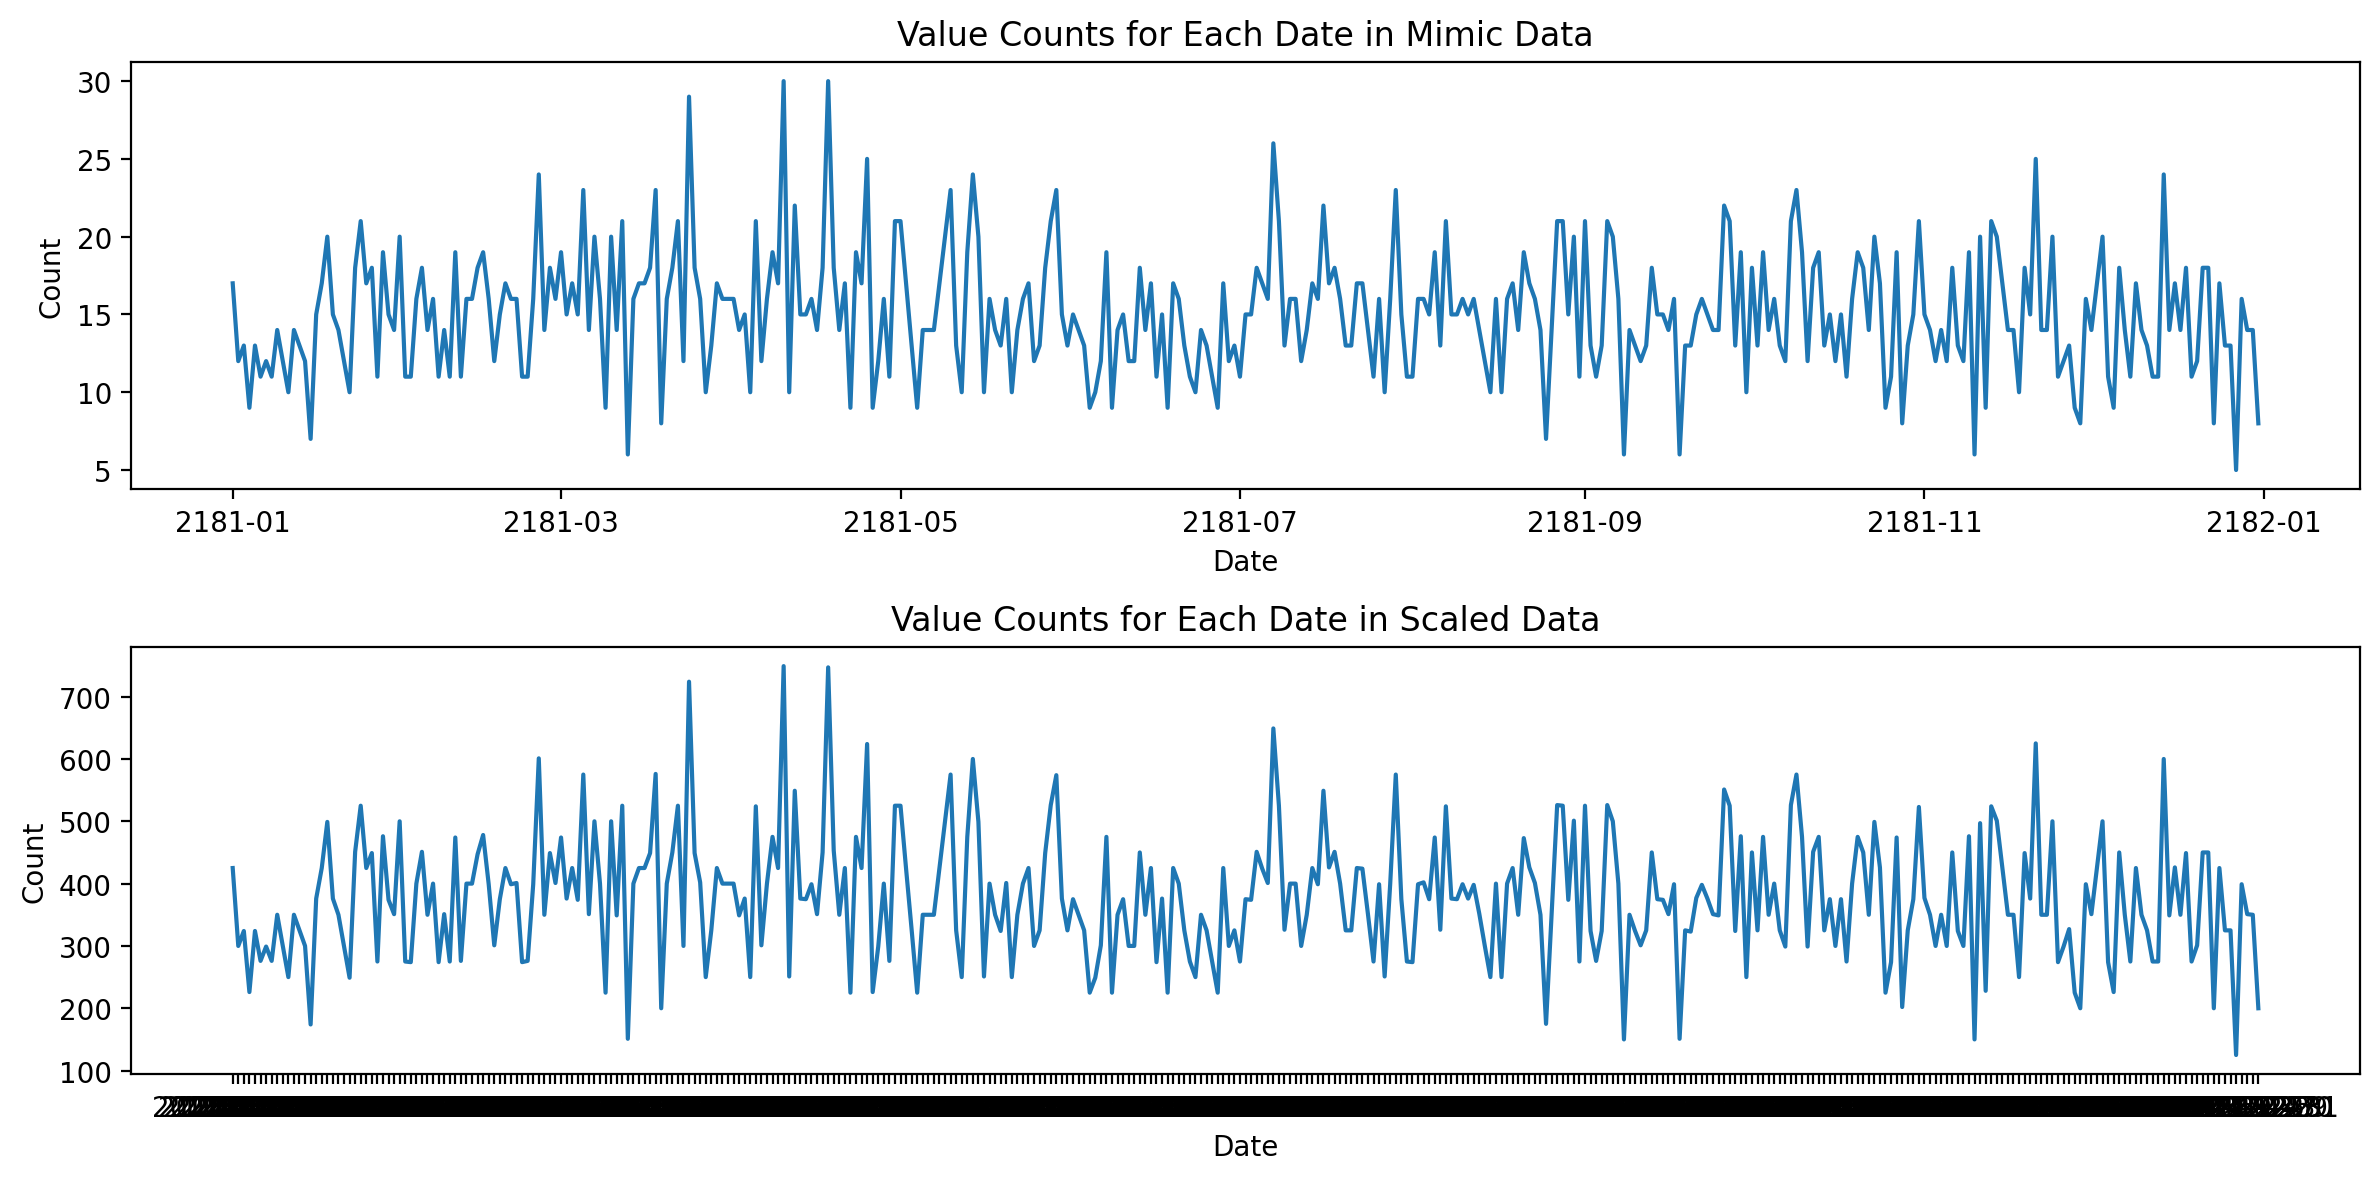

In [21]:
# Calculate value counts for the "Date" column in df and df2
mimic_df = mimic_ds['indate'].value_counts().sort_index()
generated_data_df = generated_data['Date'].value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot for df
# axes[0].line(mimic_df.index, mimic_df)
axes[0].plot(mimic_df.index, mimic_df,linestyle='-')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].set_title('Value Counts for Each Date in Mimic Data')

# Plot for df2
axes[1].plot(generated_data_df.index, generated_data_df, linestyle='-')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].set_title('Value Counts for Each Date in Scaled Data')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [23]:
# Display basic info about the DataFrame
(generated_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 137700 entries, 86 to 137642
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date_Time_Admission  137700 non-null  datetime64[ns]
 1   Patient_ID           137700 non-null  object        
 2   Stay_ID              137700 non-null  object        
 3   Gender               137700 non-null  object        
 4   Mode_of_Arrival      137700 non-null  object        
 5   Discharge_Time       137700 non-null  datetime64[ns]
 6   Disposition          137700 non-null  object        
 7   Date                 137700 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 9.5+ MB


In [24]:
# Summary statistics
print(generated_data.describe())

                 Date_Time_Admission                 Discharge_Time
count                         137700                         137700
mean   2021-06-30 18:36:45.441394176  2021-07-01 00:06:07.681045760
min              2021-01-01 00:04:00            2021-01-01 03:28:00
25%              2021-04-01 12:07:45            2021-04-01 17:38:00
50%              2021-07-01 09:19:30            2021-07-01 14:52:30
75%              2021-09-29 04:35:00            2021-09-29 10:09:30
max              2021-12-31 23:53:00            2022-01-01 06:44:00


In [25]:
# Check for missing values
print(generated_data.isnull().sum())

Date_Time_Admission    0
Patient_ID             0
Stay_ID                0
Gender                 0
Mode_of_Arrival        0
Discharge_Time         0
Disposition            0
Date                   0
dtype: int64


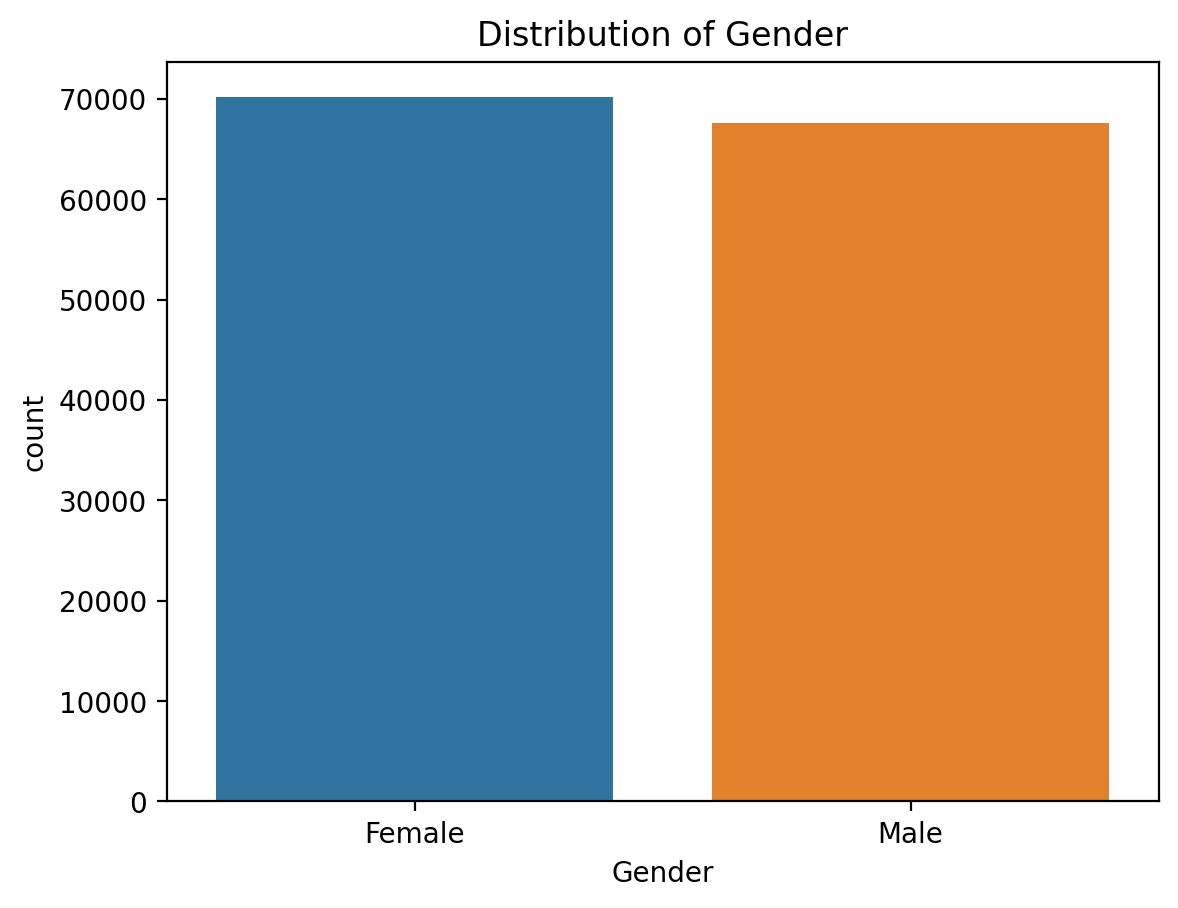

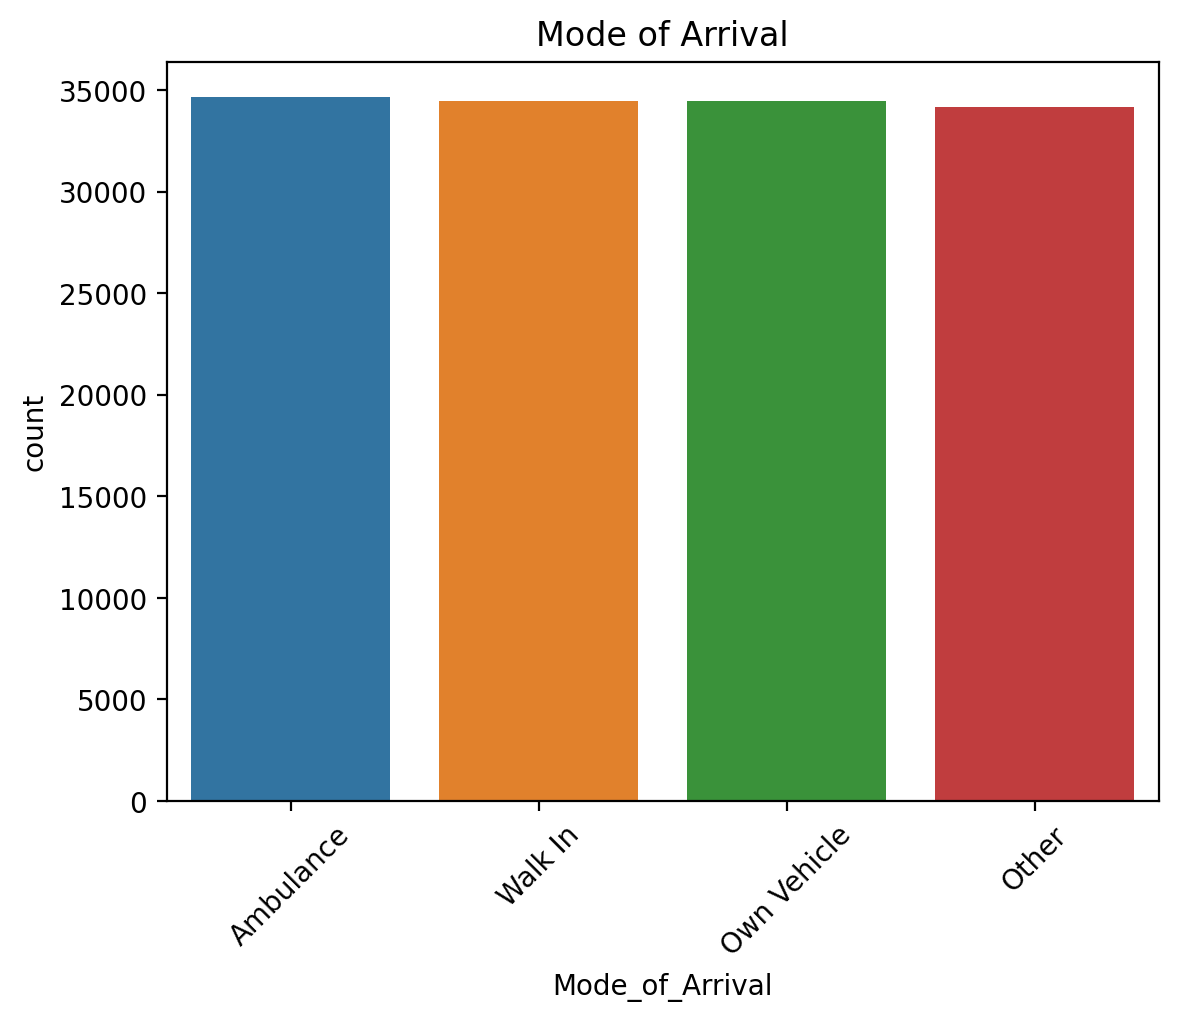

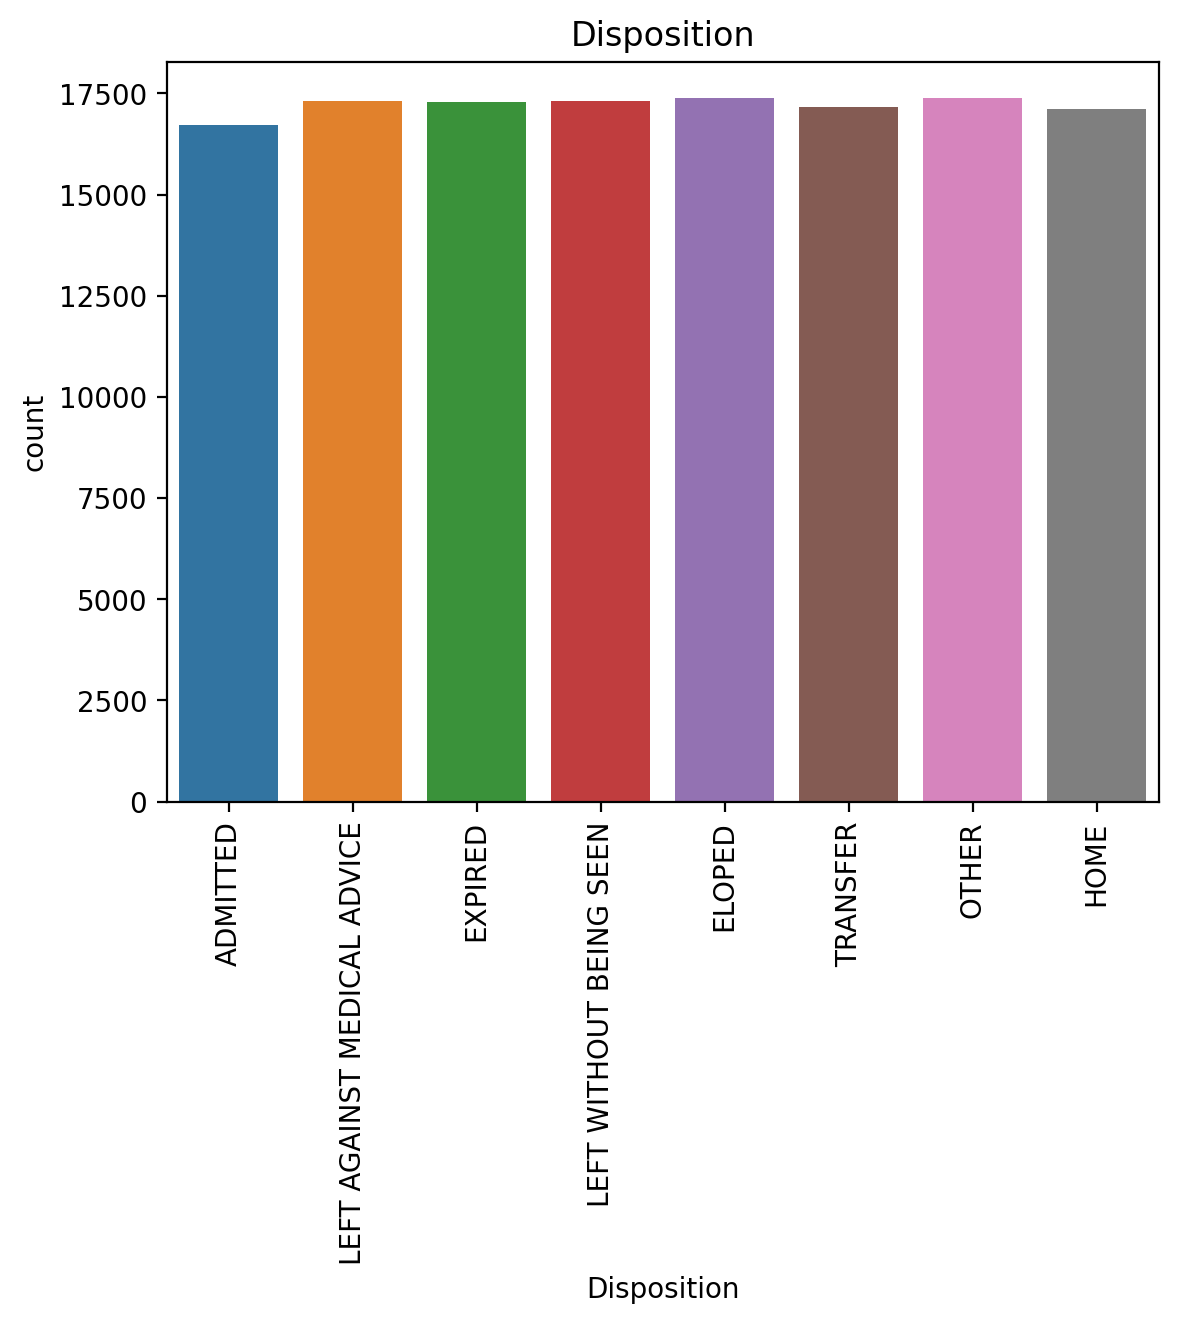

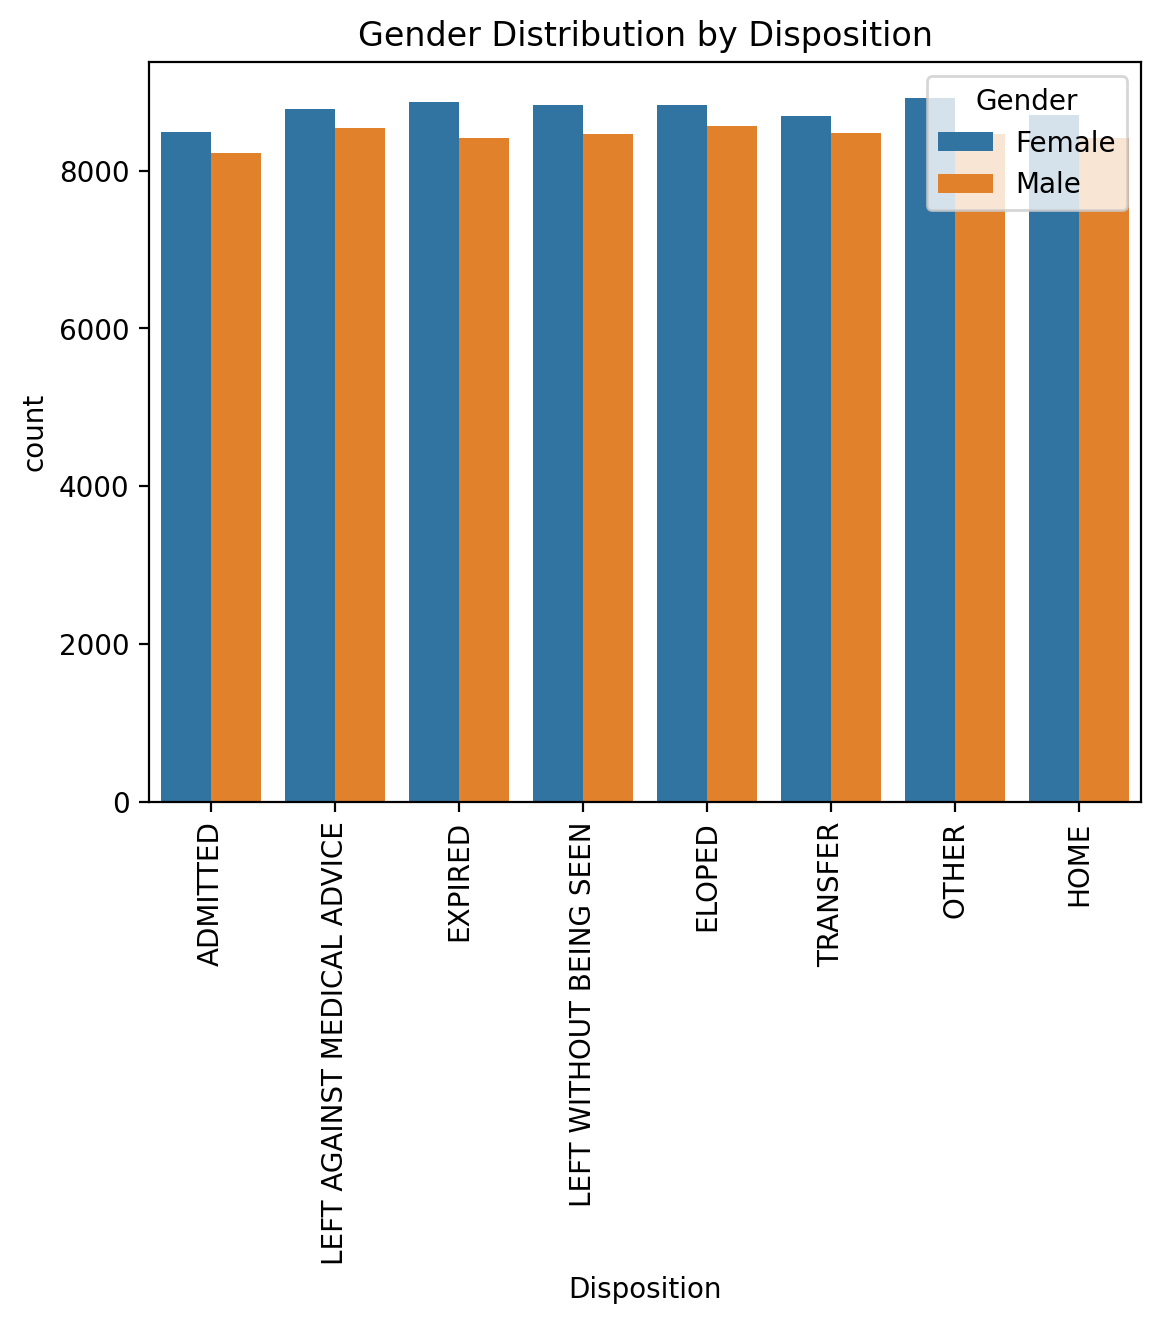

In [26]:
# Distribution of Gender
sns.countplot(data=generated_data, x='Gender')
plt.title('Distribution of Gender')
plt.show()

# Mode of Arrival
sns.countplot(data=generated_data, x='Mode_of_Arrival')
plt.title('Mode of Arrival')
plt.xticks(rotation=45)
plt.show()

# Disposition
sns.countplot(data=generated_data, x='Disposition')
plt.title('Disposition')
plt.xticks(rotation=90)
plt.show()

# Gender distribution by Disposition
sns.countplot(data=generated_data, x='Disposition', hue='Gender')
plt.title('Gender Distribution by Disposition')
plt.xticks(rotation=90)
plt.show()



# To File
[Go to Top](#Description)

In [27]:
os.getcwd()
# G:\My Drive\Work\FactiHealth\factihealth\ED\Codes\Data

'G:\\My Drive\\Work\\FactiHealth\\factihealth\\Version 1.1\\ED\\Data\\mimic_iv_ed_2_2\\ed'

In [28]:
generated_data.to_excel('..\..\..\Codes\Data\ed_data_scaled.xlsx',index=False)
generated_data.shape

(137700, 8)

In [29]:
generated_data.tail()

,Date_Time_Admission,Patient_ID,Stay_ID,Gender,Mode_of_Arrival,Discharge_Time,Disposition,Date
137500,2021-12-31 23:05:00,P2436,A92753,Male,Ambulance,2022-01-01 05:58:00,LEFT WITHOUT BEING SEEN,2021-12-31
137699,2021-12-31 23:05:00,P1591,A94918,Female,Own Vehicle,2022-01-01 03:02:00,LEFT AGAINST MEDICAL ADVICE,2021-12-31
137678,2021-12-31 23:28:00,P7427,A76430,Male,Other,2022-01-01 06:29:00,HOME,2021-12-31
137530,2021-12-31 23:38:00,P7490,A76463,Female,Ambulance,2022-01-01 06:15:00,ADMITTED,2021-12-31
137642,2021-12-31 23:53:00,P3497,A92394,Female,Walk In,2022-01-01 06:08:00,LEFT AGAINST MEDICAL ADVICE,2021-12-31
